/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

11490434/11490434 [==============================] - 1s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
Epoch 1/15
1875/1875 [==============================] - 12s 3ms/step - loss: 0.6799 - accuracy: 0.8141
Epoch 2/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2934 - accuracy: 0.9143
Epoch 3/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2327 - accuracy: 0.9319
Epoch 4/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1952 - accuracy: 0.9427
Epoch 5/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1683 - accuracy: 0.9510
Epoch 6/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1479 - accuracy: 0.9569
Epoch 7/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1324 - accuracy: 0.9617
Epoch 8/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1199 - accuracy: 0.9644
Epoch 9/15
1875/1875 [==============================] - 6s 3ms/step 

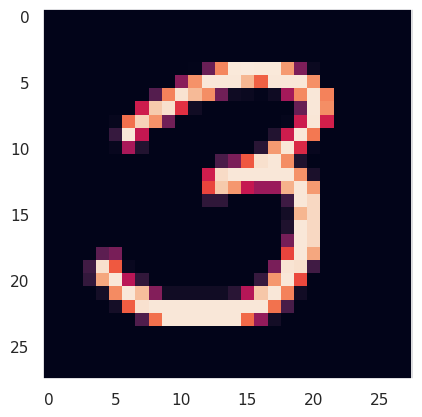

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_theme(style='dark')
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import classification_report

# Loading the dataset
(X_train, Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()
# Printing the shape of the arrays
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

# Displaying image
plt.imshow(X_train[5358])

# Normalizing the data and changing dtype to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# Adding layers to the model
cnn = keras.Sequential([
keras.layers.InputLayer(input_shape=(28, 28)),
keras.layers.Conv1D(28, kernel_size=2, activation='relu'),
keras.layers.MaxPool1D(),
keras.layers.Flatten(),
keras.layers.Dense(300, activation='relu'),
keras.layers.Dense(10, activation='softmax')
])

# Compiling the CNN model
cnn.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training the model with 15 epochs
cnn.fit(X_train, Y_train, epochs=15)

Y_prob = cnn.predict(X_test)
Y_pred = Y_prob.argmax(axis=1)
print(Y_pred)
print(Y_test)

actual_pred = pd.DataFrame()
actual_pred['Actual'] = Y_test
actual_pred['Predicted'] = Y_pred
actual_pred.head(10)

print(classification_report(Y_test, Y_pred))